In [1]:
import mglearn
import mglearn.datasets as mg_dataset

In [2]:
X, y = mg_dataset.make_blobs(centers=4, random_state=8)

print(X)
print(y)

y = y % 2
print(y)

[[ -1.72161036  -1.48033142]
 [ -3.6573384   -9.5482383 ]
 [  7.0778163    0.99508772]
 [ -1.36579859  -0.3148625 ]
 [ -2.66521206  -3.12591651]
 [  7.63027116   8.69797933]
 [ -5.27144331 -12.11880698]
 [  7.91767139   1.41547387]
 [ -1.41284184   0.11296348]
 [ -1.01519039  -1.03318203]
 [  8.2634157   10.34723435]
 [  6.96767867   8.9622523 ]
 [ -0.84779249  -2.12185612]
 [  7.48006237   2.49392925]
 [  7.71454967   1.8420701 ]
 [ -7.74064658  -8.61800744]
 [ -5.41087235  -8.7194128 ]
 [ -2.27579204  -2.89699926]
 [ -1.25668449  -2.33416219]
 [  7.61227907   9.4463627 ]
 [  8.81545663   8.76386046]
 [  7.1895354    0.43090048]
 [  7.40292703   9.16217702]
 [  5.17209648  11.78064756]
 [ -2.10476115  -1.57846672]
 [  6.5342397    9.45532341]
 [  7.59635095   8.0197955 ]
 [ -0.6560501    0.68997013]
 [ -4.86090778 -10.77386053]
 [  8.90864428   0.97764968]
 [  8.09770696  -0.58369965]
 [ -0.79757091  -2.88641638]
 [  9.92897802   1.76719511]
 [ -1.36106796  -2.02701586]
 [  5.5987887 

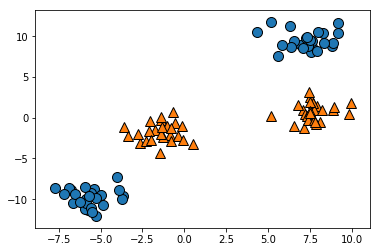

In [3]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

Text(0,0.5,'Feature 1')

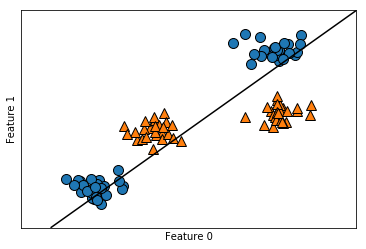

In [4]:
# 线性模型在低纬空间中无法有效分类

from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
%matplotlib inline

linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0.5,0,'Feature 2')

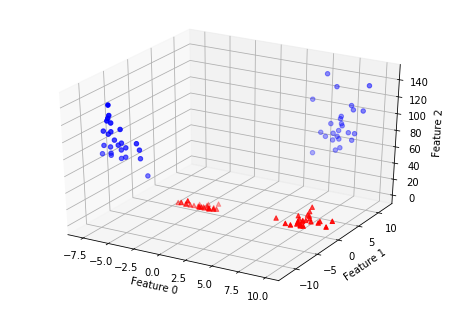

In [5]:
# 对输入进行扩展，添加第二个特征的平方作为第三个特征，在三维空间中进行分类

import numpy as np
from mpl_toolkits.mplot3d import Axes3D, axes3d

X_new = np.hstack([X, X[:, 1:] ** 2])

figure = plt.figure()
# 3D可视化
ax = Axes3D(figure)
# 首先画出所有y == 0的点， 然后画出所有y == 1的点
msk = y == 0
ax.scatter(X_new[msk, 0], X_new[msk, 1], X_new[msk, 2], c='b')
ax.scatter(X_new[~msk, 0], X_new[~msk, 1], X_new[~msk, 2], marker='^', c='r')
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.set_zlabel("Feature 2")

(50,)
(50,)
(50, 50)
(50, 50)


Text(0.5,0,'Feature 2')

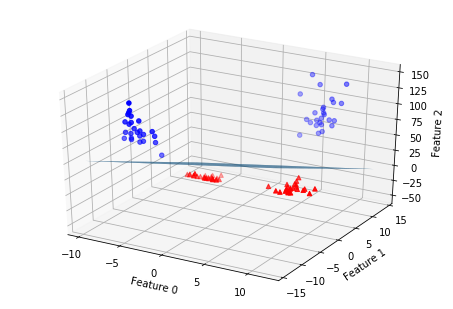

In [6]:
liner_svm_3d = LinearSVC().fit(X_new, y)
coef = liner_svm_3d.coef_.ravel()
intercept = liner_svm_3d.intercept_.ravel()

# 显示线性决策边界
figure = plt.figure()
ax = Axes3D(figure)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

print(xx.shape)
print(yy.shape)

XX, YY = np.meshgrid(xx, yy)

print(XX.shape)
print(YY.shape)

ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]

ax.plot_surface(XX, YY, ZZ)
ax.scatter(X_new[msk, 0], X_new[msk, 1], X_new[msk, 2], c='b')
ax.scatter(X_new[~msk, 0], X_new[~msk, 1], X_new[~msk, 2], marker='^', c='r')
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.set_zlabel("Feature 2")

Text(0,0.5,'Feature 1')

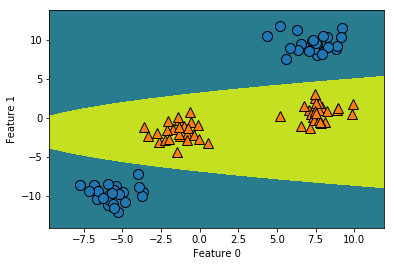

In [7]:
ZZ = YY ** 2
dec = liner_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()])
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0,0.5,'Feature 1')

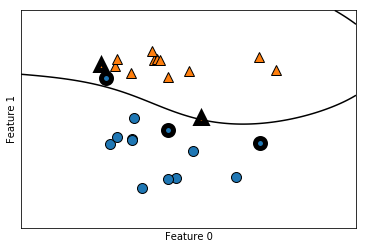

In [8]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1)
svm.fit(X, y)

mglearn.plots.plot_2d_separator(svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# 画出支持向量
sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, markeredgewidth=5)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

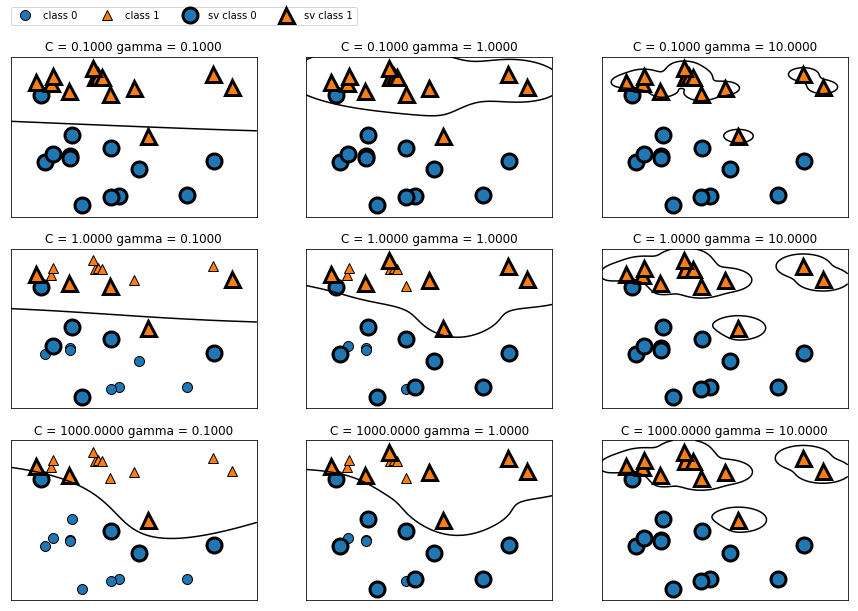

In [9]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"], ncol=4, loc=(0, 1.2))

In [10]:
# 在乳腺癌数据集上使用SVM，默认参数 C=1，gamma=1/n_features
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
print(svc.score(X_train, y_train))
print(svc.score(X_test, y_test))

1.0
0.6293706293706294


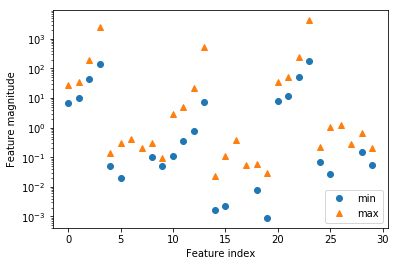

In [12]:
# 观察数据集中每个特征的最大值和最小值

plt.plot(X_train.min(axis=0), 'o', label='min')
plt.plot(X_train.max(axis=0), '^', label='max')
plt.legend(loc=4)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log")

In [13]:
# 预处理数据（归一化处理）

# 计算训练集中每个特征的最小值
min_on_training = X_train.min(axis=0)
# 计算训练集中每个特征的范围（最大值-最小值）
range_on_training = (X_train - min_on_training).max(axis=0)

# 每个特征减去最小值，然后再除以范围
X_train_scaled = (X_train - min_on_training) / range_on_training

print(X_train_scaled.min(axis=0))
print(X_train_scaled.max(axis=0))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [14]:
# 利用训练集的最小值和范围对测试集做相同的变换
X_test_scaled = (X_test - min_on_training) / range_on_training

In [15]:
svc_new = SVC(C=1000)
svc_new.fit(X_train_scaled, y_train)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
print(svc_new.score(X_train_scaled, y_train))
print(svc_new.score(X_test_scaled, y_test))

0.9882629107981221
0.972027972027972
